In [ ]:
import pynr as nr
import matplotlib.pyplot as plt

In [2]:
hp_rit,hx_rit= nr.nr_waveform(code='RIT',
                              pycbc_format=True,
    rit_root_folder='/work/francisco.jimenez/RIT/Data',
    download_Q = True,
    tag = 'RIT:BBH:0001',
    modes  = [[2,2],[2,-2]],
    mass  = 100,
    distance  = 100,
    inclination = 0,
    coa_phase = 0,
    modes_combined = True,
    delta_t = 1/1024,
    tapering = False,
    RD = True,
    zero_align = True )

Extracting and combining modes


In [3]:
hp_sxs,hx_sxs= nr.nr_waveform(code='SXS',pycbc_format=True,
    download_Q = True,
    tag = 'SXS:BBH:0305',
    extrapolation_order = 2,
    resolution_level = -1,
    modes  = [[2,2],[2,-2]],
    mass  = 100,
    distance  = 100,
    inclination = 0,
    coa_phase = 0,
    modes_combined = True,
    delta_t = 1/1024,
    tapering = False,
    RD = True,
    zero_align = True )

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer


/work/francisco.jimenez/venv_sc/lib/python3.7/site-packages/sxs/waveforms/nrar.py:173: UserWarning: 
Could not find root group as `h5_group` or as `extrapolation_order`; returning all groups
  warnings.warn(warning)


Extracting and combining modes


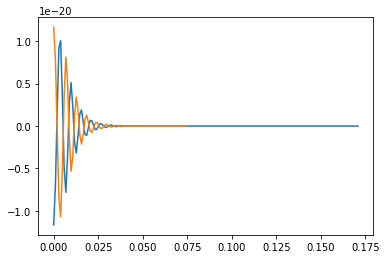

In [4]:
plt.plot(hp_rit.sample_times,hp_rit)
plt.plot(hp_sxs.sample_times,hp_sxs)